In [1]:
from main import *

In [29]:
import matplotlib.pyplot as plt
from typing import Optional

Label = Optional[str]
points : list[tuple[float, float, Label]] = []
lines : list[tuple[tuple[float, float], tuple[float, float], Label]] = []
polys : list[list[tuple[float, float]]] = []

def draw_point(m: Geo, label: Optional[str]=None):
    x, y = coords(m)  # type: ignore
    points.append((x, y, label))
X_RANGE = (-3, 3)
Y_RANGE = (-10, 10)
def line(l: Geo) -> tuple[Geo, Geo]:
    l = l.normalize()
    mid = l.inv()*(l | O)
    dist = 3
    M = exp(dist*l*I)
    a = M * mid / M
    M = exp(-dist*l*I)
    b = M * mid / M
    return a, b
def draw_line(m: Geo, label: Optional[str]=None):
    A, B = line(m)
    x1, y1 = coords(A)  # type: ignore
    x2, y2 = coords(B)  # type: ignore
    lines.append(((x1, x2), (y1, y2), label))
    
        

def draw_poly(ms: list[Geo], label: Optional[str]=None):
    points2 = []
    for m in ms:
        xy = coords(m)
        points2.append(xy)
    polys.append(points2)

def draw(m: Geo | list[Geo], label: str | None = None) -> None:
    if isinstance(m, list):
        draw_poly(m)
    else:
        g = m.grade()
        if g == dim-1:
            draw_point(m, label)
        elif g == dim-2:
            draw_line(m, label)
        elif g == dim-3:
            assert False, 'TODO: planes'
        else:
            raise ValueError(f"error: don't know how to draw {m}")

def show() -> None:
    global points, polys, lines
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.axis('equal')
    for points2 in polys:
        xs = []
        ys = []
        for x, y in points2:
            xs.append(x)
            ys.append(y)
        ax.fill(xs, ys, alpha=.5)
    for xs, ys, label in lines:
        ax.plot(xs, ys)
        if label is not None:
            x = sum(xs)/2
            y = sum(ys)/2
            ax.annotate(label,
                xy=(x, y), xycoords='data',
                xytext=(4, 4), textcoords='offset points')
    for x, y, label in points:
        ax.plot(x, y, 'ro')
        if label is not None:
            # plt.annotate(label, xy=(x, y))
            ax.annotate(label,
                    xy=(x, y), xycoords='data',
                    xytext=(4, 4), textcoords='offset points')
    points = []
    polys = []
    lines = []
    fig.show()

/tmp/ipykernel_31957/3178261843.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


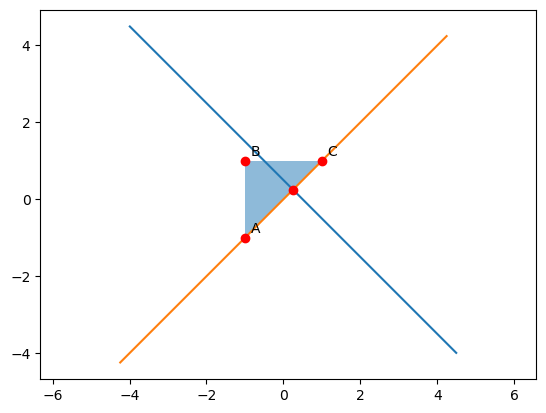

In [30]:
A = (-1*e1 - 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (1*e1 + 1*e2 + e0).dual()
draw(A, 'A')
draw(B, 'B')
draw(C, 'C')
draw([A, B, C])

L = 1*e1 + 1*e2 -0.5*e0
draw(L)

M = C & A
draw(M)

D = L ^ M
draw(D)

show()

/tmp/ipykernel_31957/3178261843.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


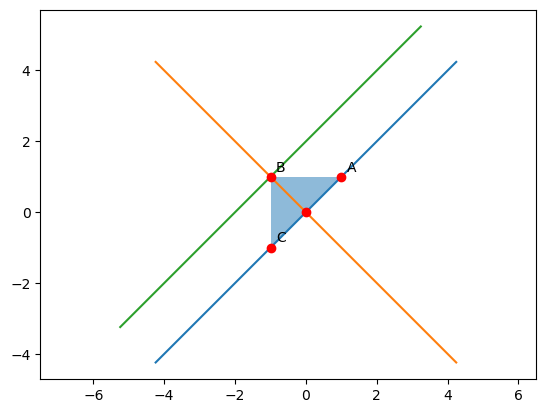

In [31]:
A = (1*e1 + 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (-1*e1 - 1*e2 + e0).dual()
draw(A, 'A')
draw(B, 'B')
draw(C, 'C')
draw([A, B, C])

AC = A & C
draw(A & C)

draw(AC | B)
draw((AC | B) / B)
#  | operator is left contraction, so i need a slighly different formula
draw(AC.inv() * (AC | B))

show()

/tmp/ipykernel_31957/3178261843.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


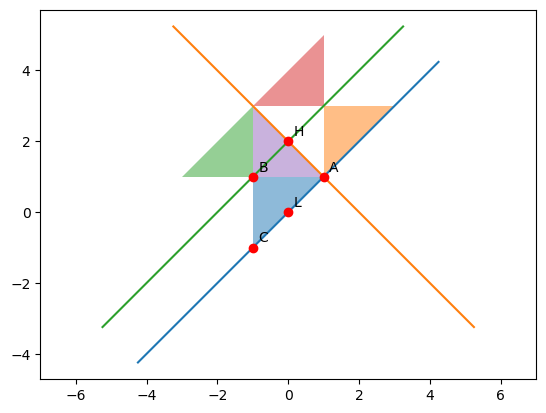

In [32]:
A = (1*e1 + 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (-1*e1 - 1*e2 + e0).dual()
draw(A, 'A')
draw(B, 'B')
draw(C, 'C')
draw([A, B, C])

L = A & C
draw(L, 'L')

draw(L | A)

# project L on B
draw((L | B) / B)

# project B on L
draw(L.inv() * (L | B))

p = L | A
draw([-1*p*X/p for X in [A, B, C]])

q = (L | B) / B
draw([-1*q*X/q for X in [A, B, C]])

H = q ^ (L | A)
draw(H, 'H')
draw([-1*H*X/H for X in [A, B, C]])


R = (B & A)/(B & L.inv() * (L | B))
draw([R*X/R for X in [A, B, C]])

show()